In [871]:
import numpy as np
def J(theta,z):
    #np.random.seed(10)
    s=0
    d=0
    for k in range(100):
        W_mean=[]
        for j in range(700):
            A=np.random.exponential(5, 12)
            S=list(np.random.exponential(theta, 12))
            S.insert(0,0)
            W=[0]
            for i in range(11):
                W.append(max(0,W[i]+S[i]-A[i+1]))
            W_mean.append(np.mean(W[1:11]))
        W_mean.sort()
        l=W_mean[int(0.9*len(W_mean))]
        s+=(l-z)**2
        d+=l-z
    return s/100,d/100

In [878]:
theta=[]
def SA(J,theta_list,z,number):
    for i in range(number):
        theta=10/(i+100)
        #theta_list.append(max(0,theta_list[i]-SPSA(J,theta_list[i],z)*theta))
        s,d=J(theta_list[i],z)
        theta_list.append(max(0,theta_list[i]-2*(d)*theta))
        Jvalue.append(s)
    return theta_list[-1]

In [898]:
for i in range(500):
    Jvalue=[]
    number=20
    z=8
    theta_list=[1]
    SA(J,theta_list,z,number)
    theta.append(np.mean(theta_list[15:-1]))

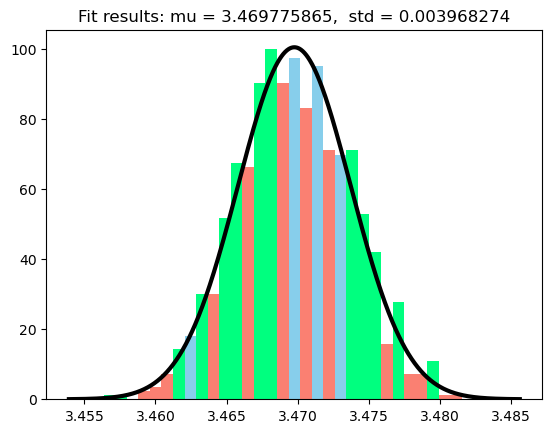

In [899]:
plt.figure(1)
mu = np.mean(theta)    
std = np.std(theta)
number_of_bins=40
bins = np.linspace(mu-4*std, mu+4*std, number_of_bins)
n, bins, patches = plt.hist(theta, bins, density=True)

def true_value(i):
    return norm.pdf(((mu-4*std+i*2*4*std/(number_of_bins-1))+2*4*std/(2*(number_of_bins-1))), mu, std)

for i in range(number_of_bins-1):
    if n[i] < true_value(i):            # Give bar red color if lower than PDF
        patches[i].set_fc('salmon')     
    if n[i] > true_value(i):            # Give bar green color if higher than PDF
            patches[i].set_fc('springgreen')   
    if n[i] <= 0.05*n[i] + true_value(i) and n[i] >= -0.05*n[i] + true_value(i):
        patches[i].set_fc('skyblue')    # Give bar blue color if approx. equal to PDF

# Plotting the PDF of the normal distribution
x = np.linspace(mu-4*std, mu+4*std, 1000)
y = norm.pdf(x, mu, std)              # PDF: 1/(√(2π))*exp(-(x-μ)^2/2σ^2)

plt.plot(x, y, lw=3, color='black', label = 'PDF')       
# print(" mean theta_n = ", mu, "standard deviation theta_n " , std)
title = "Fit results: mu = %.9f,  std = %.9f" % (mu, std)
plt.title(title)
#plt.title("SA experiment")
plt.show()

Text(0.5, 1.0, 'J()')

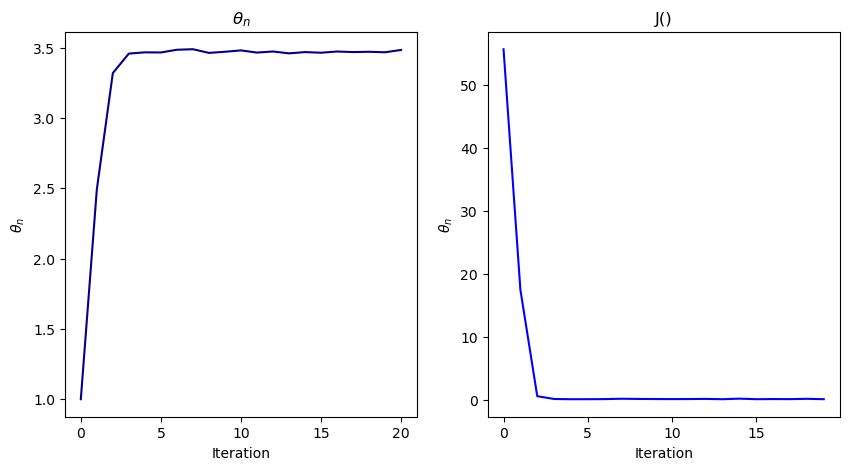

In [883]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2, figsize=(10,5))
# Plot the iterate
axs[0].plot(theta_list, color="darkblue")
axs[0].set_xlabel("Iteration")
axs[0].set_ylabel(r"$\theta_n$")
axs[0].set_title(r"$\theta_n$")
axs[1].plot(Jvalue, color="blue")
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel(r"$\theta_n$")
axs[1].set_title('J()')